# Boosting Techniques: Assignment Questions

## Question 1: What is Boosting in Machine Learning? Explain how it improves weak learners.

**Boosting** is a sequential ensemble learning technique that combines multiple simple models, known as **weak learners**, to create a single, highly accurate model, or **strong learner**. A weak learner is a model that performs only slightly better than random guessing.

Boosting improves weak learners through an iterative process:

1.  **Sequential Training:** Unlike bagging, which trains models in parallel, boosting trains them one after another (sequentially).
2.  **Focus on Errors:** Each new weak learner is specifically trained to correct the mistakes made by the previous models in the sequence. 
3.  **Weighted Importance:** The algorithm gives more weight or focus to the data points that were misclassified by earlier models. This forces subsequent models to pay more attention to the difficult-to-classify examples.
4.  **Final Combination:** The final prediction is a weighted combination of the predictions from all the weak learners, where better-performing models are given a higher influence.

Think of it like a student studying for an exam. They take a practice test (the first model), and then they focus their studying on the questions they got wrong (the errors). They take another practice test, and again, they focus on their new mistakes. By repeating this process, their overall knowledge (the strong learner) becomes much more accurate.

## Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

The primary difference between **AdaBoost (Adaptive Boosting)** and **Gradient Boosting** lies in *how* they focus on the errors of the previous models.

### AdaBoost
AdaBoost focuses on the **misclassified data points**. 
- **Mechanism:** It maintains a set of weights for each training instance. In each iteration, the weights of the instances that were incorrectly classified by the previous model are increased. 
- **Goal of the Next Model:** The next weak learner is trained on this re-weighted dataset, forcing it to concentrate on the high-weight, difficult instances.
- **Final Prediction:** The final model is a weighted sum of all weak learners, where each learner's weight is determined by its overall accuracy.

### Gradient Boosting
Gradient Boosting focuses on the **residual errors** of the previous models.
- **Mechanism:** The first model is trained on the data to make an initial prediction. The algorithm then calculates the difference between the predictions and the actual values (the residuals or errors). 
- **Goal of the Next Model:** Instead of re-weighting the data points, the next weak learner is trained to predict these residual errors.
- **Final Prediction:** The prediction from this new model is added to the previous model's prediction, and the process is repeated. Each new model incrementally improves the overall prediction by correcting the remaining error. This process is analogous to using gradient descent to minimize a loss function.

## Question 3: How does regularization help in XGBoost?

**Regularization** is a key feature in XGBoost that helps to **prevent overfitting** and improve the model's generalization to unseen data. It adds a penalty term to the objective function, discouraging the model from becoming overly complex.

XGBoost incorporates regularization in several ways:

1.  **L1 (Lasso) and L2 (Ridge) Regularization:**
    - **L1 Regularization (`alpha`):** This adds a penalty proportional to the absolute value of the leaf weights. It can shrink some leaf weights to exactly zero, which has a feature selection-like effect.
    - **L2 Regularization (`lambda`):** This adds a penalty proportional to the square of the leaf weights. It makes the final learned weights smoother and less extreme, which is the more common approach for preventing overfitting.

2.  **Tree Complexity Control:**
    - **`gamma` (min_split_loss):** This parameter specifies the minimum loss reduction required to make a further split on a leaf node. A higher `gamma` value leads to a more conservative algorithm, as it requires a more significant improvement to justify adding another split.
    - **`max_depth`:** This explicitly limits the maximum depth of each tree, directly controlling its complexity.

By adding these penalties, XGBoost balances the goal of fitting the training data well with the goal of keeping the model simple, which ultimately leads to better performance on new data.

## Question 4: Why is CatBoost considered efficient for handling categorical data?

**CatBoost (Categorical Boosting)** is considered highly efficient for handling categorical data because it incorporates a novel, automated technique called **Ordered Target Statistics (or Ordered TS)**.

Here's why this is so effective:

1.  **Avoids Target Leakage:** A common way to handle categorical features is with target encoding, where each category is replaced by the average target value for that category. However, this can lead to "target leakage," where information from the target variable leaks into the feature, causing the model to overfit. CatBoost solves this by calculating the target statistic for each data point based only on the target values of the *preceding* data points in a random permutation of the dataset. This ensures the model learns from the past without peeking at the current target value.

2.  **Reduces Overfitting:** This ordered approach provides a more robust and less noisy encoding of categorical features, which helps prevent the model from overfitting, especially with high-cardinality features (features with many unique categories).

3.  **Automatic and Seamless:** CatBoost handles this entire process internally and automatically. The data scientist simply needs to specify the indices of the categorical columns. This saves a significant amount of time and effort that would otherwise be spent on manual and complex feature engineering for categorical variables.

## Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Boosting techniques are generally preferred over bagging methods in real-world applications where **achieving the highest possible predictive accuracy is the primary goal**, especially on structured or tabular data.

Some specific applications include:

1.  **Credit Scoring and Fraud Detection:** In finance, the cost of a single misclassification (e.g., approving a fraudulent transaction or a high-risk loan) is very high. Boosting's ability to minimize bias and squeeze out maximum performance makes it a top choice.

2.  **Search Engine Ranking:** Ranking web pages is a classic problem where models need to learn complex, non-linear relationships. Gradient Boosting is a core technology used by many search engines to rank results.

3.  **Medical Diagnosis:** Predicting the presence of a disease from patient data requires extreme accuracy. Boosting algorithms are often used to build highly sensitive diagnostic models.

4.  **Customer Churn Prediction:** Companies want to identify customers who are likely to leave their service with high precision. Boosting helps build effective models that can pinpoint at-risk customers from subtle patterns in their behavior.

In these scenarios, the focus is on performance, and the slight increase in training time and sensitivity to noise associated with boosting is an acceptable trade-off for its superior accuracy.

---

## Question 6: Write a Python program to train an AdaBoost Classifier on the Breast Cancer dataset and print the model accuracy.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an AdaBoost Classifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_clf.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_clf.predict(X_test)

# Print the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier Accuracy: 0.9825


## Question 7: Write a Python program to train a Gradient Boosting Regressor on the California Housing dataset and evaluate performance using R-squared score.

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred = gb_reg.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")

Gradient Boosting Regressor R-squared Score: 0.7803


## Question 8: Write a Python program to train an XGBoost Classifier on the Breast Cancer dataset, tune the learning rate using GridSearchCV, and print the best parameters and accuracy.

In [23]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Classifier (this line has been updated)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

# Define the hyperparameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# Set up and run GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and accuracy
print(f"Best Learning Rate: {grid_search.best_params_['learning_rate']}")
print(f"Best Model Accuracy: {accuracy:.4f}")

Best Learning Rate: 0.3
Best Model Accuracy: 0.9649


## Question 9: Write a Python program to train a CatBoost Classifier and plot the confusion matrix using seaborn.

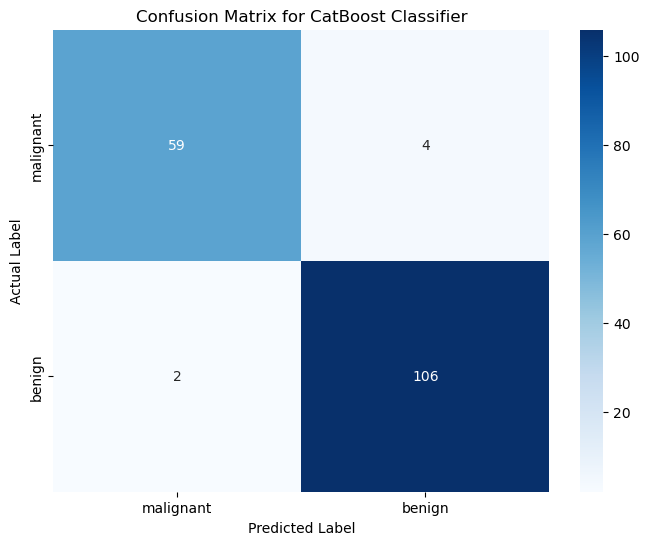

In [21]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a CatBoost Classifier
# Set verbose=0 to suppress training output
cat_clf = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, random_state=42, verbose=0)
cat_clf.fit(X_train, y_train)

# Make predictions
y_pred = cat_clf.predict(X_test)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix for CatBoost Classifier')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Question 10: You're working for a FinTech company trying to predict loan default... Describe your step-by-step data science pipeline using boosting techniques.

Here is a step-by-step data science pipeline to predict loan default using boosting techniques, addressing the specific challenges of an imbalanced dataset with missing values and mixed data types.

### 1. Data Preprocessing & Handling Missing/Categorical Values
This is a critical first step to prepare the data for the model.
- **Missing Values:**
  - For **numeric features** (e.g., income, age), I would use median imputation, as it is robust to outliers. Mean imputation is an alternative if the data is not skewed.
  - For **categorical features** (e.g., employment type, location), I would use mode (most frequent category) imputation or create a new category called 'Missing'.
- **Categorical Features:**
  - For features with low cardinality (few unique values), **one-hot encoding** is a reliable choice.
  - For features with high cardinality, one-hot encoding would create too many columns. Here, I would rely on the chosen model's capabilities (see next step).
- **Feature Scaling:** I would scale all numeric features using `StandardScaler` to ensure that features with larger ranges do not disproportionately influence the model.

### 2. Choice between AdaBoost, XGBoost, or CatBoost
My choice would be **CatBoost**. 
- **Justification:** The dataset has both numeric and categorical features, and CatBoost is specifically designed to handle categorical data automatically and effectively using its ordered target encoding. This eliminates the need for manual high-cardinality encoding and reduces the risk of target leakage. Furthermore, CatBoost is often more robust and less prone to overfitting than XGBoost with default parameters.

### 3. Hyperparameter Tuning Strategy
To find the best model configuration, I would use a systematic tuning strategy.
- **`RandomizedSearchCV`:** I would start with a randomized search over a broad range of hyperparameters (`iterations`, `learning_rate`, `depth`, `l2_leaf_reg`) to efficiently identify promising regions in the parameter space.
- **`GridSearchCV`:** After the initial random search, I would perform a more focused grid search on a smaller range of parameters around the best results from the first step to fine-tune the model.
- **`scale_pos_weight`:** Given the imbalanced dataset, I would tune this crucial parameter (or use the `auto_class_weights` feature in CatBoost) to give more importance to the minority class (defaults).

### 4. Evaluation Metrics
Since the dataset is imbalanced, accuracy is a poor metric. I would use the following:
- **AUC-ROC:** This is the primary metric to evaluate the model's overall ability to distinguish between defaulting and non-defaulting customers.
- **Precision-Recall Curve (AUPRC):** This is critical for imbalanced datasets. It focuses on the performance of the positive (default) class, showing the trade-off between identifying true defaulters (recall) and the accuracy of those positive predictions (precision).
- **F1-Score:** The harmonic mean of precision and recall, providing a single score that balances the concerns of misclassifying defaults.

### 5. How the Business Would Benefit
A highly accurate loan default model would provide significant business value:
- **Reduced Financial Loss:** By accurately identifying high-risk applicants, the company can avoid lending to individuals likely to default, directly reducing credit losses and improving profitability.
- **Increased Efficiency:** The model can automate the initial screening of loan applications, allowing human underwriters to focus their time on borderline or complex cases, speeding up the approval process for low-risk customers.
- **Data-Driven Policy:** Feature importance from the model can provide insights into the key drivers of default, helping the company refine its lending policies and risk assessment strategies for the future.